<a href="https://colab.research.google.com/github/KNmitra/Bhavcopy/blob/master/Analysis%20on%20Stock%20Portfolio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 KB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 KB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 KB 11.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.2/128.2 KB 14.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 55.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.0/111.0 KB 12.3 MB/s eta 0:00:00
                   Open         High          Low        Close    Adj Close  \
Date                                                                          
2013-01-09  6006.200195  6020.100098  5958.450195  5971.500000  5971.500000   
2013-01-10  5998.799805  6005.149902  5947.299805  5968.649902  5968.649902   
2013-01-11  6012.399902  6018.850098  5940.600098  5951.299805  5951.299805   
2013-01-14  5967.200195  6036.899902  5962.149902  6024.049805  6024.049805   
2013-01-15  6037.850098  6068.500000  6018.6

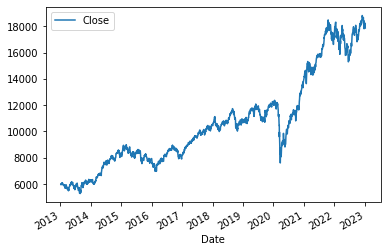

In [2]:
#install the require library & import tham
#download the historial data for NSE50

import warnings
warnings.filterwarnings('ignore')
try:
    import yfinance
except:
    !pip install -q yfinance
    import yfinance

import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import datetime
from datetime import date,timedelta
import numpy as np

df = yf.download ("^NSEI",
                  start = date.today()-timedelta(days=365*10),
                  end=date.today(),
                  progress=False,)

df=df.dropna()
print (df.head())

df.plot(y='Close')




Mean returns of NIFTY50 is: 1.0005111807612372
Mean returns of NIFTY50 + 1Std.Dev 1.0117750468890188
Mean returns of NIFTY50 + 1Std.Dev 0.9892473146334557


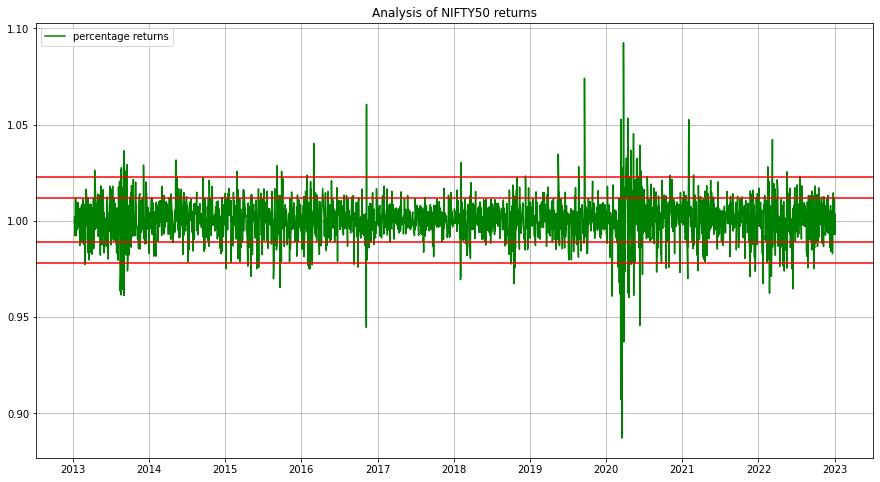

In [3]:
#Basic Analysis 1: Return analysis
df['Returns']=df['Open'].shift(-1) / df['Open'] # difference between tomorrows opening to todays opning price
#Mean asd STD.DIV of returns
mean_returns =df['Returns'].mean()
print("Mean returns of NIFTY50 is:", mean_returns) # 0.05% we are expecting each day a return of 0.05%.
std_dev = df['Returns'].std()

print ('Mean returns of NIFTY50 + 1Std.Dev',mean_returns + std_dev) # 0 and 1.0117%
print ('Mean returns of NIFTY50 + 1Std.Dev',mean_returns - std_dev) # 0 and -0.9892%

#Advance plot
plt.figure(figsize=(15,8))
plt.title("Analysis of NIFTY50 returns")
plt.plot(df['Returns'],color = 'green',label='percentage returns')
plt.axhline(y=mean_returns+(std_dev*2),color='red',linestyle ='-')
plt.axhline(y=mean_returns+(std_dev*1),color='red',linestyle ='-')
plt.axhline(y=mean_returns-(std_dev*1),color='red',linestyle ='-')
plt.axhline(y=mean_returns-(std_dev*2),color='red',linestyle ='-')
plt.legend(loc = 'upper left')
plt.grid()
plt.show()


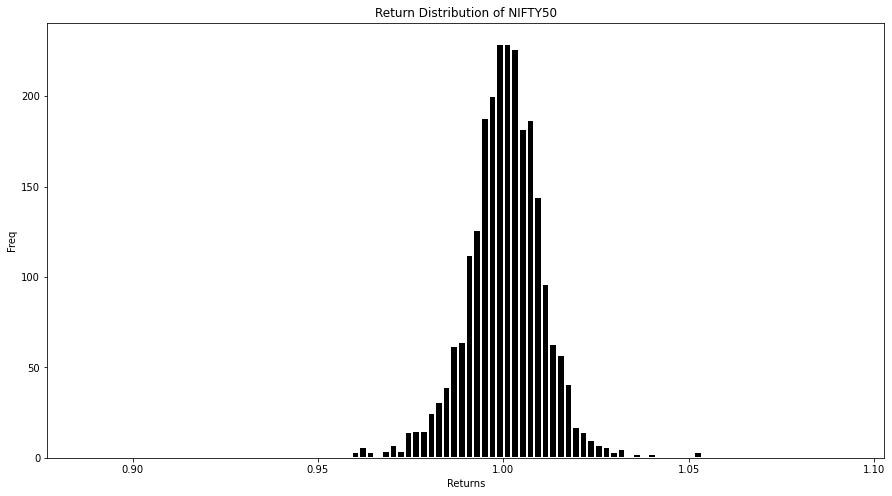

In [4]:
#Basic Matrics analysis 2: Return distribution
plt.figure(figsize=(15,8))
plt.hist(df['Returns'],color ='Black',edgecolor='white',linewidth=2,bins=100)
plt.title('Return Distribution of NIFTY50')
plt.xlabel('Returns',fontsize=10)
plt.ylabel('Freq',fontsize=10)
plt.show()

Average next return of high volatility scenario is: 0.999605521829385
Average next return of low volatility scenario is: 0.6336375936855915


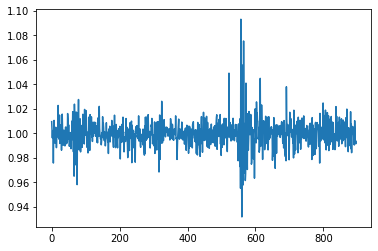

In [12]:
#Basic Matrics analysis 3: Volatility Scenarios
df['volatility'] = df['High']/df['Low']
high_volatility = np.where(df['volatility'].shift(1).ge(df['volatility'].mean()),df['Close']/df['Open'],0)
high_volatility = high_volatility[high_volatility != 0]
plt.plot(high_volatility)
print('Average next return of high volatility scenario is:',np.mean(high_volatility)) #0.099%

low_volatility = np.where(df['volatility'].shift(1).lt(df['volatility'].mean()),df['Close']/df['Open'],0)
high_volatility = high_volatility[high_volatility != 0]
print('Average next return of low volatility scenario is:',np.mean(low_volatility)) #0.063%
